In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Ravdess

In [2]:
Ravdess="C:\\Users\\Nada Najari\\Downloads\\Ravdess\\audio_speech_actors_01-24\\"
ravdess_directory_list = os.listdir(Ravdess)

In [3]:

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
1,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
2,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
3,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
4,calm,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...


In [4]:
emotion='fear'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)

In [5]:
data

array([9.51426409e-05, 1.64977813e-04, 1.19230936e-04, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00], dtype=float32)

In [6]:
sampling_rate

22050

In [7]:
Audio(path)

# Tess

In [8]:
Tess="C:\\Users\\Nada Najari\\Downloads\\TESS\\tess toronto emotional speech set data/TESS Toronto emotional speech set data\\"
tess_directory_list = os.listdir(Tess)

In [9]:
file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,angry,C:\Users\Nada Najari\Downloads\TESS\tess toron...
1,angry,C:\Users\Nada Najari\Downloads\TESS\tess toron...
2,angry,C:\Users\Nada Najari\Downloads\TESS\tess toron...
3,angry,C:\Users\Nada Najari\Downloads\TESS\tess toron...
4,angry,C:\Users\Nada Najari\Downloads\TESS\tess toron...


# Savee

In [10]:
Savee1 = "C:\\Users\\Nada Najari\\Downloads\\SAVEE/AudioData/DC/"
Savee2 = "C:\\Users\\Nada Najari\\Downloads\\SAVEE/AudioData/JE/"
Savee3 = "C:\\Users\\Nada Najari\\Downloads\\SAVEE/AudioData/JK/"
Savee4 = "C:\\Users\\Nada Najari\\Downloads\\SAVEE/AudioData/KL/"

In [11]:
L=[Savee1,Savee2,Savee3,Savee4]
file_emotion=[]
file_path=[]

for i in L:
    savee_directory_list= os.listdir(i)
    
    for file in savee_directory_list:
        file_path.append(i+file)
        ele=file[:-6]
        if ele=='a':
            file_emotion.append('angry')
        elif ele=='d':
            file_emotion.append('disgust')
        elif ele=='f':
            file_emotion.append('fear')
        elif ele=='h':
            file_emotion.append('happy')
        elif ele=='n':
            file_emotion.append('neutral')
        elif ele=='sa':
            file_emotion.append('sad')
        else:
            file_emotion.append('surprise')
            
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,angry,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
1,angry,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
2,angry,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
3,angry,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
4,angry,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...


# Crema

In [12]:
Crema="C:\\Users\\Nada Najari\\Downloads\\Crema\\AudioWAV\\"
crema_directory_list = os.listdir(Crema)

In [13]:
file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,angry,C:\Users\Nada Najari\Downloads\Crema\AudioWAV\...
1,disgust,C:\Users\Nada Najari\Downloads\Crema\AudioWAV\...
2,fear,C:\Users\Nada Najari\Downloads\Crema\AudioWAV\...
3,happy,C:\Users\Nada Najari\Downloads\Crema\AudioWAV\...
4,neutral,C:\Users\Nada Najari\Downloads\Crema\AudioWAV\...


# Final Data

In [14]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
1,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
2,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
3,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
4,calm,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...


In [15]:
data_path

,Emotions,Path
0,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
1,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
2,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
3,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
4,calm,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
...,...,...
475,surprise,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
476,surprise,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
477,surprise,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
478,surprise,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...


In [16]:
data_path.reset_index(drop=True)

,Emotions,Path
0,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
1,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
2,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
3,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
4,calm,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
...,...,...
12157,surprise,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
12158,surprise,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
12159,surprise,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
12160,surprise,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...


In [17]:
data_path['Emotions'].unique()

array(['neutral', 'calm', 'happy', 'sad', 'angry', 'fear', 'disgust',
       'surprise'], dtype=object)

# Visualisation des données

<AxesSubplot:>

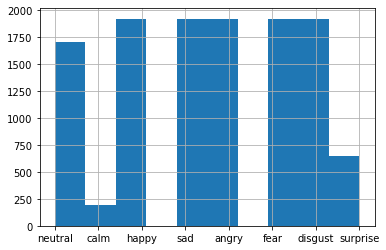

In [18]:
data_path['Emotions'].hist()

In [19]:
import collections
collections.Counter(data_path['Emotions'])

Counter({'neutral': 1703,
         'calm': 192,
         'happy': 1923,
         'sad': 1923,
         'angry': 1923,
         'fear': 1923,
         'disgust': 1923,
         'surprise': 652})

# Final Classes

In [20]:
df=pd.concat([data_path.loc[data_path['Emotions']=='neutral'], data_path.loc[data_path['Emotions']=='sad'], data_path.loc[data_path['Emotions']=='angry'],data_path.loc[data_path['Emotions']=='fear'], data_path.loc[data_path['Emotions']=='disgust']], axis = 0)

In [21]:
df

,Emotions,Path
0,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
1,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
2,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
3,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
60,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
...,...,...
385,disgust,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
386,disgust,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
387,disgust,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
388,disgust,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...


In [22]:
df.reset_index(drop=True)

,Emotions,Path
0,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
1,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
2,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
3,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
4,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
...,...,...
9390,disgust,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
9391,disgust,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
9392,disgust,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
9393,disgust,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...


In [23]:
df['Emotions'].unique()

array(['neutral', 'sad', 'angry', 'fear', 'disgust'], dtype=object)

# Feature extraction

In [24]:
for path, emotion in zip(data_path.Path, data_path.Emotions):
    print (path)
    print(emotion)

C:\Users\Nada Najari\Downloads\Ravdess\audio_speech_actors_01-24\Actor_01/03-01-01-01-01-01-01.wav
neutral
C:\Users\Nada Najari\Downloads\Ravdess\audio_speech_actors_01-24\Actor_01/03-01-01-01-01-02-01.wav
neutral
C:\Users\Nada Najari\Downloads\Ravdess\audio_speech_actors_01-24\Actor_01/03-01-01-01-02-01-01.wav
neutral
C:\Users\Nada Najari\Downloads\Ravdess\audio_speech_actors_01-24\Actor_01/03-01-01-01-02-02-01.wav
neutral
C:\Users\Nada Najari\Downloads\Ravdess\audio_speech_actors_01-24\Actor_01/03-01-02-01-01-01-01.wav
calm
C:\Users\Nada Najari\Downloads\Ravdess\audio_speech_actors_01-24\Actor_01/03-01-02-01-01-02-01.wav
calm
C:\Users\Nada Najari\Downloads\Ravdess\audio_speech_actors_01-24\Actor_01/03-01-02-01-02-01-01.wav
calm
C:\Users\Nada Najari\Downloads\Ravdess\audio_speech_actors_01-24\Actor_01/03-01-02-01-02-02-01.wav
calm
C:\Users\Nada Najari\Downloads\Ravdess\audio_speech_actors_01-24\Actor_01/03-01-02-02-01-01-01.wav
calm
C:\Users\Nada Najari\Downloads\Ravdess\audio_speech_

In [25]:
L=list(zip(data_path.Path, data_path.Emotions))

In [26]:
L[0]

('C:\\Users\\Nada Najari\\Downloads\\Ravdess\\audio_speech_actors_01-24\\Actor_01/03-01-01-01-01-01-01.wav',
 'neutral')

In [27]:
for i in L:
    print(i)

('C:\\Users\\Nada Najari\\Downloads\\Ravdess\\audio_speech_actors_01-24\\Actor_01/03-01-01-01-01-01-01.wav', 'neutral')
('C:\\Users\\Nada Najari\\Downloads\\Ravdess\\audio_speech_actors_01-24\\Actor_01/03-01-01-01-01-02-01.wav', 'neutral')
('C:\\Users\\Nada Najari\\Downloads\\Ravdess\\audio_speech_actors_01-24\\Actor_01/03-01-01-01-02-01-01.wav', 'neutral')
('C:\\Users\\Nada Najari\\Downloads\\Ravdess\\audio_speech_actors_01-24\\Actor_01/03-01-01-01-02-02-01.wav', 'neutral')
('C:\\Users\\Nada Najari\\Downloads\\Ravdess\\audio_speech_actors_01-24\\Actor_01/03-01-02-01-01-01-01.wav', 'calm')
('C:\\Users\\Nada Najari\\Downloads\\Ravdess\\audio_speech_actors_01-24\\Actor_01/03-01-02-01-01-02-01.wav', 'calm')
('C:\\Users\\Nada Najari\\Downloads\\Ravdess\\audio_speech_actors_01-24\\Actor_01/03-01-02-01-02-01-01.wav', 'calm')
('C:\\Users\\Nada Najari\\Downloads\\Ravdess\\audio_speech_actors_01-24\\Actor_01/03-01-02-01-02-02-01.wav', 'calm')
('C:\\Users\\Nada Najari\\Downloads\\Ravdess\\audio_

In [28]:
x,sr=librosa.load(L[0][0])

In [29]:
x,sr

(array([ 1.6517616e-08, -6.5464434e-08,  1.2522355e-07, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32),
 22050)

## Zero Crossing Rate

In [30]:
feature_zcr=librosa.feature.zero_crossing_rate(x)

In [31]:
feature_zcr

array([[0.06933594, 0.12109375, 0.21435547, 0.28125   , 0.30859375,
        0.39404297, 0.45019531, 0.41455078, 0.47949219, 0.47460938,
        0.32470703, 0.3984375 , 0.44287109, 0.33886719, 0.45507812,
        0.37890625, 0.24707031, 0.30957031, 0.19628906, 0.21386719,
        0.17382812, 0.16015625, 0.23925781, 0.23242188, 0.36523438,
        0.33105469, 0.30175781, 0.28027344, 0.24707031, 0.33447266,
        0.46240234, 0.54882812, 0.59667969, 0.59130859, 0.53564453,
        0.53125   , 0.53320312, 0.546875  , 0.52636719, 0.50244141,
        0.42626953, 0.38769531, 0.34570312, 0.32128906, 0.27197266,
        0.18701172, 0.13525391, 0.06152344, 0.046875  , 0.09765625,
        0.15917969, 0.17333984, 0.18896484, 0.14404297, 0.0859375 ,
        0.07470703, 0.140625  , 0.19042969, 0.21679688, 0.21191406,
        0.13330078, 0.07910156, 0.05566406, 0.06347656, 0.06982422,
        0.07910156, 0.09912109, 0.09277344, 0.08251953, 0.06396484,
        0.03222656, 0.02587891, 0.02294922, 0.02

In [32]:
feature_zcr[0][0]

0.0693359375

In [33]:
np.shape(feature_zcr)

(1, 143)

## Spectral Centroid

In [34]:
feature_sc=librosa.feature.spectral_centroid(y=x, sr=sr)

In [35]:
feature_sc

array([[5248.86430438, 5212.61628047, 4959.05295041, 4892.38739963,
        4850.71402738, 4843.43107992, 4665.12835689, 4481.33944605,
        4522.08236838, 4727.0384619 , 4697.37076589, 4714.84537308,
        4872.15732958, 4603.53335385, 4579.60948808, 4974.85898131,
        5057.75019619, 5077.86491817, 5017.23781831, 5064.69924672,
        5130.37895138, 5049.94878137, 5048.69548678, 5063.91543642,
        5013.02067824, 4983.48216163, 4994.791214  , 5075.69412754,
        5052.02195658, 4504.16423383, 4462.13745956, 4330.72944463,
        4328.33008921, 4450.98641395, 5339.87079193, 6942.68777996,
        6596.78280087, 6565.45476644, 6360.45821635, 5548.97811651,
        4654.88909242, 3857.48676385, 4156.61553878, 4267.71490471,
        4173.75609269, 2217.75822928, 1726.90979312, 1799.76135662,
        1667.23123244, 1755.83876589, 3343.61217265, 4289.08755347,
        3267.65745843, 2206.13009165, 1943.65212994, 1849.41989675,
        2392.7789774 , 3932.90776511, 4113.91416

In [36]:
np.shape(feature_sc)

(1, 143)

## Energy

In [37]:
hop_length = 256
frame_length = 512

feature_energy = np.array([
    sum(abs(x[i:i+frame_length]**2))
    for i in range(0, len(x), hop_length)
])

In [38]:
type(feature_energy)

numpy.ndarray

In [39]:
len(feature_energy)

285

## Entropy

In [40]:
import antropy as ant
ant.spectral_entropy(x, sf=sr)

10.875077616033465

## Contrast

In [41]:
contrast = librosa.feature.spectral_contrast(y=x,sr=sr)

In [42]:
type(contrast)

numpy.ndarray

## En Général type_1

In [43]:
from pyAudioAnalysis import ShortTermFeatures

F, f_names = ShortTermFeatures.feature_extraction(x, sr, 0.050*sr, 0.025*sr)

In [44]:
F

array([[ 1.99818347e-02,  2.17983651e-02,  5.81289737e-02, ...,
         1.99818347e-02,  7.26612171e-02,  6.72116258e-02],
       [ 9.28700583e-10,  1.21575241e-09,  2.32790221e-09, ...,
         9.54276868e-10,  3.66354207e-09,  3.51058909e-09],
       [ 2.73532745e+00,  2.32598588e+00,  2.37716577e+00, ...,
         2.94271329e+00,  2.18439594e+00,  2.06526402e+00],
       ...,
       [ 0.00000000e+00,  1.35518063e-03,  2.44505205e-04, ...,
        -2.69148193e-03,  7.71459126e-03,  8.96026991e-04],
       [ 0.00000000e+00,  3.78310126e-04,  8.98782041e-05, ...,
        -3.78693061e-04,  1.61404599e-03, -6.85569016e-04],
       [ 0.00000000e+00, -8.99758190e-05, -1.06751766e-02, ...,
         1.23583919e-02, -2.05346096e-02,  4.64775731e-04]])

In [45]:
for row in F:
    print (row)

[0.01998183 0.02179837 0.05812897 0.09445958 0.06721163 0.07447775
 0.06721163 0.06176203 0.07266122 0.03451408 0.03996367 0.09809264
 0.07811081 0.01634877 0.02906449 0.01998183 0.01998183 0.02906449
 0.0181653  0.00908265 0.01271571 0.0181653  0.06357856 0.06357856
 0.0236149  0.0236149  0.03633061 0.06357856 0.09445958 0.20163488
 0.3106267  0.37057221 0.44323342 0.53224342 0.56948229 0.49500454
 0.39872843 0.30790191 0.30517711 0.30517711 0.29155313 0.19346049
 0.05540418 0.04722979 0.044505   0.09900091 0.23524069 0.22797457
 0.11262489 0.09536785 0.07447775 0.05358765 0.21525886 0.32061762
 0.19346049 0.0808356  0.04632153 0.06357856 0.07084469 0.06811989
 0.08446866 0.13079019 0.1017257  0.03542234 0.03269755 0.02815622
 0.01998183 0.02724796 0.0390554  0.04632153 0.04722979 0.04813806
 0.04722979 0.04087193 0.03542234 0.0417802  0.03723887 0.02270663
 0.03723887 0.04268847 0.03723887 0.0390554  0.03814714 0.04268847
 0.04268847 0.04087193 0.0390554  0.03814714 0.04541326 0.0517

In [46]:
f_names

['zcr',
 'energy',
 'energy_entropy',
 'spectral_centroid',
 'spectral_spread',
 'spectral_entropy',
 'spectral_flux',
 'spectral_rolloff',
 'mfcc_1',
 'mfcc_2',
 'mfcc_3',
 'mfcc_4',
 'mfcc_5',
 'mfcc_6',
 'mfcc_7',
 'mfcc_8',
 'mfcc_9',
 'mfcc_10',
 'mfcc_11',
 'mfcc_12',
 'mfcc_13',
 'chroma_1',
 'chroma_2',
 'chroma_3',
 'chroma_4',
 'chroma_5',
 'chroma_6',
 'chroma_7',
 'chroma_8',
 'chroma_9',
 'chroma_10',
 'chroma_11',
 'chroma_12',
 'chroma_std',
 'delta zcr',
 'delta energy',
 'delta energy_entropy',
 'delta spectral_centroid',
 'delta spectral_spread',
 'delta spectral_entropy',
 'delta spectral_flux',
 'delta spectral_rolloff',
 'delta mfcc_1',
 'delta mfcc_2',
 'delta mfcc_3',
 'delta mfcc_4',
 'delta mfcc_5',
 'delta mfcc_6',
 'delta mfcc_7',
 'delta mfcc_8',
 'delta mfcc_9',
 'delta mfcc_10',
 'delta mfcc_11',
 'delta mfcc_12',
 'delta mfcc_13',
 'delta chroma_1',
 'delta chroma_2',
 'delta chroma_3',
 'delta chroma_4',
 'delta chroma_5',
 'delta chroma_6',
 'delta chro

In [47]:
np.shape(F), len(f_names)

((68, 131), 68)

In [48]:
np.shape(F[0])

(131,)

In [49]:
len(F)

68

In [50]:
df=pd.DataFrame()
features=[]
for row in F[0]:
    features.append(row)

In [51]:
for i in range(len(F)):
    print(F[i])

[0.01998183 0.02179837 0.05812897 0.09445958 0.06721163 0.07447775
 0.06721163 0.06176203 0.07266122 0.03451408 0.03996367 0.09809264
 0.07811081 0.01634877 0.02906449 0.01998183 0.01998183 0.02906449
 0.0181653  0.00908265 0.01271571 0.0181653  0.06357856 0.06357856
 0.0236149  0.0236149  0.03633061 0.06357856 0.09445958 0.20163488
 0.3106267  0.37057221 0.44323342 0.53224342 0.56948229 0.49500454
 0.39872843 0.30790191 0.30517711 0.30517711 0.29155313 0.19346049
 0.05540418 0.04722979 0.044505   0.09900091 0.23524069 0.22797457
 0.11262489 0.09536785 0.07447775 0.05358765 0.21525886 0.32061762
 0.19346049 0.0808356  0.04632153 0.06357856 0.07084469 0.06811989
 0.08446866 0.13079019 0.1017257  0.03542234 0.03269755 0.02815622
 0.01998183 0.02724796 0.0390554  0.04632153 0.04722979 0.04813806
 0.04722979 0.04087193 0.03542234 0.0417802  0.03723887 0.02270663
 0.03723887 0.04268847 0.03723887 0.0390554  0.03814714 0.04268847
 0.04268847 0.04087193 0.0390554  0.03814714 0.04541326 0.0517

In [52]:
df=pd.DataFrame()
features=[]
for l in range(len(F)):
    for row in (F[l]):
        features.append(row)
    data=[features]
    colonnes=[]
    for k in range(len(features)):
        colonnes.append('x'+str(k))
df1=pd.DataFrame(data,columns=colonnes)
df=pd.concat([df,df1],ignore_index=True)

In [53]:
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x8898,x8899,x8900,x8901,x8902,x8903,x8904,x8905,x8906,x8907
0,0.019982,0.021798,0.058129,0.09446,0.067212,0.074478,0.067212,0.061762,0.072661,0.034514,...,-0.022567,-0.002894,0.005396,-0.00286,-0.00507,-0.001254,0.002643,0.012358,-0.020535,0.000465


In [54]:
68*131

8908

## En Général type_2

In [55]:
for i in range(len(f_names)):
    if (i==2) or (i==6) or (i==7) or (i==36) or (i==40) or (i==41):
        continue
    print(i, f_names[i])

0 zcr
1 energy
3 spectral_centroid
4 spectral_spread
5 spectral_entropy
8 mfcc_1
9 mfcc_2
10 mfcc_3
11 mfcc_4
12 mfcc_5
13 mfcc_6
14 mfcc_7
15 mfcc_8
16 mfcc_9
17 mfcc_10
18 mfcc_11
19 mfcc_12
20 mfcc_13
21 chroma_1
22 chroma_2
23 chroma_3
24 chroma_4
25 chroma_5
26 chroma_6
27 chroma_7
28 chroma_8
29 chroma_9
30 chroma_10
31 chroma_11
32 chroma_12
33 chroma_std
34 delta zcr
35 delta energy
37 delta spectral_centroid
38 delta spectral_spread
39 delta spectral_entropy
42 delta mfcc_1
43 delta mfcc_2
44 delta mfcc_3
45 delta mfcc_4
46 delta mfcc_5
47 delta mfcc_6
48 delta mfcc_7
49 delta mfcc_8
50 delta mfcc_9
51 delta mfcc_10
52 delta mfcc_11
53 delta mfcc_12
54 delta mfcc_13
55 delta chroma_1
56 delta chroma_2
57 delta chroma_3
58 delta chroma_4
59 delta chroma_5
60 delta chroma_6
61 delta chroma_7
62 delta chroma_8
63 delta chroma_9
64 delta chroma_10
65 delta chroma_11
66 delta chroma_12
67 delta chroma_std


In [56]:
df=pd.DataFrame()
features=[]
for l in range(len(F)):
    if (l==2) or (l==6) or (l==7) or (l==36) or (l==40) or (l==41):
        continue
    for row in (F[l]):
        features.append(row)
for i in range(len(contrast)):
    for row in contrast[i]:
        features.append(row)
    data=[features]
    colonnes=[]
    for k in range(len(features)):
        colonnes.append('x'+str(k))
df1=pd.DataFrame(data,columns=colonnes)
df=pd.concat([df,df1],ignore_index=True)

In [57]:
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x9113,x9114,x9115,x9116,x9117,x9118,x9119,x9120,x9121,x9122
0,0.019982,0.021798,0.058129,0.09446,0.067212,0.074478,0.067212,0.061762,0.072661,0.034514,...,49.71324,50.176227,47.936866,46.854768,47.634224,46.345824,44.65747,47.016732,46.795658,42.0273


In [58]:
(68-6)*131

8122

In [59]:
np.shape(contrast)

(7, 143)

In [60]:
(143*7)+8122

9123

## En Général type_3

In [61]:
df=pd.DataFrame()
for i in L:
    x,sr=librosa.load(i[0])
    F, f_names = ShortTermFeatures.feature_extraction(x, sr, 0.050*sr, 0.025*sr)
    contrast = librosa.feature.spectral_contrast(y=x,sr=sr)
    features=[]
    for l in range(len(F)):
        if (l==2) or (l==6) or (l==7) or (l==36) or (l==40) or (l==41):
            continue
        for row in (F[l]):
            features.append(row)
    for j in range(len(contrast)):
        for row in contrast[j]:
            features.append(row)
    data=[features]
    colonnes=[]
    for k in range(len(features)):
        colonnes.append('x'+str(k))
    df1=pd.DataFrame(data,columns=colonnes)
    df=pd.concat([df,df1],ignore_index=True)

In [62]:
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x19754,x19755,x19756,x19757,x19758,x19759,x19760,x19761,x19762,x19763
0,0.019982,0.021798,0.058129,0.094460,0.067212,0.074478,0.067212,0.061762,0.072661,0.034514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.069028,0.056312,0.081744,0.138056,0.138056,0.078111,0.121708,0.178020,0.248865,0.257947,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.161671,0.148955,0.151680,0.163488,0.136240,0.120799,0.171662,0.221617,0.156222,0.122616,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.305177,0.335150,0.373297,0.386921,0.366031,0.362398,0.331517,0.265213,0.285195,0.329700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.210718,0.150772,0.106267,0.130790,0.147139,0.154405,0.176203,0.158038,0.112625,0.105359,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157,0.000908,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12158,0.000908,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12159,0.056312,0.059037,0.061762,0.067212,0.069936,0.068120,0.060854,0.046322,0.055404,0.073569,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12160,0.069936,0.047230,0.036331,0.055404,0.053588,0.026340,0.023615,0.039964,0.052679,0.061762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df.isnull().sum()

x0            0
x1            0
x2            0
x3            0
x4            0
          ...  
x19759    12161
x19760    12161
x19761    12161
x19762    12161
x19763    12161
Length: 19764, dtype: int64

In [64]:
df.fillna(0)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x19754,x19755,x19756,x19757,x19758,x19759,x19760,x19761,x19762,x19763
0,0.019982,0.021798,0.058129,0.094460,0.067212,0.074478,0.067212,0.061762,0.072661,0.034514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.069028,0.056312,0.081744,0.138056,0.138056,0.078111,0.121708,0.178020,0.248865,0.257947,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.161671,0.148955,0.151680,0.163488,0.136240,0.120799,0.171662,0.221617,0.156222,0.122616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.305177,0.335150,0.373297,0.386921,0.366031,0.362398,0.331517,0.265213,0.285195,0.329700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.210718,0.150772,0.106267,0.130790,0.147139,0.154405,0.176203,0.158038,0.112625,0.105359,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157,0.000908,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12158,0.000908,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12159,0.056312,0.059037,0.061762,0.067212,0.069936,0.068120,0.060854,0.046322,0.055404,0.073569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12160,0.069936,0.047230,0.036331,0.055404,0.053588,0.026340,0.023615,0.039964,0.052679,0.061762,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
df1.isnull().sum()

x0        0
x1        0
x2        0
x3        0
x4        0
         ..
x19759    0
x19760    0
x19761    0
x19762    0
x19763    0
Length: 19764, dtype: int64

# Fill the missing values

In [65]:
df1=df.fillna(0)

In [66]:
df1.isnull().sum()

x0        0
x1        0
x2        0
x3        0
x4        0
         ..
x19759    0
x19760    0
x19761    0
x19762    0
x19763    0
Length: 19764, dtype: int64

# Export to csv

In [67]:
df1.to_csv(r'C:\\Users\\Nada Najari\\Downloads\\Final Dataset.csv')

# PCA

In [68]:
from sklearn.preprocessing import StandardScaler
std_slc = StandardScaler()
X_std = std_slc.fit_transform(df1)
print(X_std.shape)
print(X_std)

(12162, 19764)
[[-0.50785124 -0.52703296 -0.40339458 ... -0.00906808 -0.00906808
  -0.00906808]
 [-0.19303609 -0.36208329 -0.3035365  ... -0.00906808 -0.00906808
  -0.00906808]
 [ 0.40161476  0.08067635 -0.00780297 ... -0.00906808 -0.00906808
  -0.00906808]
 ...
 [-0.27465483 -0.34906095 -0.3880318  ... -0.00906808 -0.00906808
  -0.00906808]
 [-0.18720617 -0.4054911  -0.49557126 ... -0.00906808 -0.00906808
  -0.00906808]
 [-0.23384546 -0.22751909 -0.27281094 ... -0.00906808 -0.00906808
  -0.00906808]]


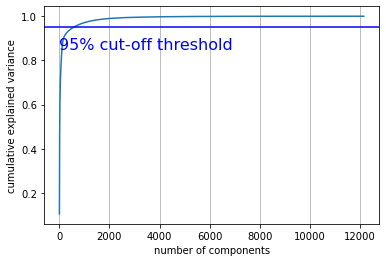

In [69]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=0.95, color='b', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'blue', fontsize=16)
plt.grid(axis = 'x')
plt.show()

In [71]:
pca = PCA(n_components=800)

X_std_pca = pca.fit_transform(X_std)
print(X_std_pca.shape)
print(X_std_pca)


colonnes=[]
for i in range(len(X_std_pca[0])):
    colonnes.append('x'+str(i))

df=pd.DataFrame(X_std_pca,columns=colonnes)

(12162, 800)
[[-1.97955777e+00 -3.02107209e+00  4.15754605e+00 ...  1.39948536e+00
   7.43607410e-01 -7.20082456e-01]
 [-1.84968052e+00 -3.11881965e+00  4.35864296e+00 ... -9.01984107e-01
   7.40054516e-02  8.67656877e-01]
 [-1.78089483e+00 -3.20586441e+00  3.83518101e+00 ...  1.00464932e+00
  -5.22653480e-01 -3.81419517e-01]
 ...
 [ 1.08216834e-01 -3.70511340e+00  5.05689415e+00 ...  1.81938073e-01
  -1.82335791e+00 -5.80570168e-01]
 [-1.37807853e+01  2.42648368e+02 -3.52340316e+02 ... -3.02341370e+00
  -7.73437976e-01  2.26480686e+00]
 [-3.57300880e+01  6.38186548e+02  1.58106224e+02 ... -1.36555020e-01
  -2.82579134e-01 -1.02449928e+00]]


In [72]:
df.to_csv(r'C:\\Users\\Nada Najari\\Downloads\\Final Dataset2.csv')